In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import  Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [301]:
(X_full, y_full), (X_test, y_test) = fashion_mnist.load_data()

In [302]:
print(X_full.shape, X_full.dtype)
print(y_full.shape, y_full.dtype)

# Scale and change dtype to float
X_full = X_full[:] / 255.0

print(X_full.shape, X_full.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(60000, 28, 28) float64


In [303]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneakers", "Bag", "Ankle Boot"]

In [304]:
def plot_fmnist_image(X, y, index):
    plt.title(class_names[y[index]])
    plt.axis("off")
    plt.imshow(X[index], cmap="binary")

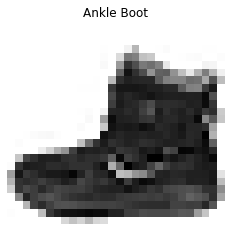

In [305]:
plot_fmnist_image(X_full, y_full, 0)

In [306]:
model = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(400, activation=relu),
    Dense(200, activation=relu),
    Dense(100, activation=relu),
    Dense(10, activation=softmax)
])

In [307]:
model.compile(
    optimizer=SGD(learning_rate=0.001),
    loss=sparse_categorical_crossentropy,
    metrics=["accuracy"]
)

In [308]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_67 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_68 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_69 (Dense)             (None, 10)                1010      
Total params: 415,310
Trainable params: 415,310
Non-trainable params: 0
_________________________________________________________________


In [309]:
history = model.fit(X_full, y_full, epochs=50, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 6s 119us/sample - loss: 1.4923 - accuracy: 0.5881 - val_loss: 0.9707 - val_accuracy: 0.6982

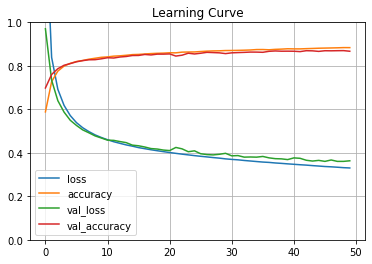

In [310]:
pd.DataFrame(history.history).plot()
plt.title("Learning Curve")
plt.grid(True)
plt.gca().set_ylim((0,1))
plt.show()

In [311]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[64.63210984039307, 0.842]

In [312]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [313]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [314]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U10')

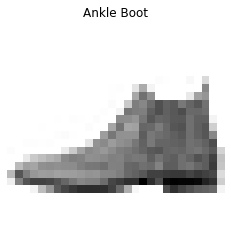

In [315]:
plot_fmnist_image(X_new, y_pred, 0)

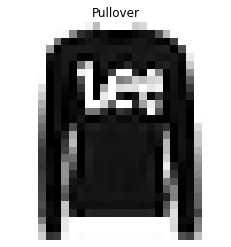

In [316]:
plot_fmnist_image(X_new, y_pred, 1)

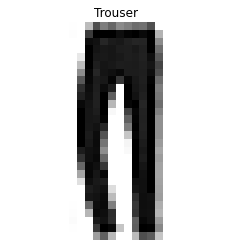

In [317]:
plot_fmnist_image(X_new, y_pred, 2)